In [2]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Introduction to Pandas

## From the Pandas documentation:

Here are just a few of the things that pandas does well:

- Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets
- **Hierarchical labeling** of axes (possible to have multiple labels per tick)
- **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### 10 Minutes Intro to Pandas ###
http://pandas.pydata.org/pandas-docs/stable/10min.html

## Set up Pandas default params

In [3]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [4]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.18.1
Numpy version: 1.11.2


In [5]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

## Data structures

### 1. Series

One Dimensional Array / Vector of Values (Think these as your data columns).  One important aspect of them is that they carry an "index" (which you can think of as a row indicator).

### 2. Dataframes

Think of DataFrame as a Table with Columns.  This is the workhorse of everything you will do with data analysis.  Learning Pandas and its functions can be challenging, but stick with it and ask questions.  Structurally, a DataFrame can be thought of as a collection of Series objects with the same index.

### 3. [Panel Data](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html)

Three Dimensional Arrays  (Mentioned for reference, but we will not get much into these)

In [6]:
# So, what is a Pandas Dataframe

In [7]:
pd.Series?

In [8]:
## Make a Series
s = pd.Series([1,3,5,np.nan,6,8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
pd.DataFrame?

In [10]:
## Make a dataframe from a numpy array
df1 = pd.DataFrame(np.random.randn(6,4), columns=list('ABCD')) 
df1

,A,B,C,D
0,-0.029,-1.337,-2.277,0.582
1,0.304,-1.896,-1.364,-0.682
2,1.226,1.445,1.259,-0.915
3,-0.613,0.577,-0.426,-0.442
4,2.570,0.299,-0.992,-1.498
5,0.802,-1.656,-0.080,2.833


In [11]:
## Make a dataframe from a dictionary
df2 = pd.DataFrame({ 'A' : 1., \
                    'B' : pd.Timestamp('20130102'), \
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'), \
                    'D' : np.array([3] * 4,dtype='int32'), \
                    'E' : pd.Categorical(["test","train","test","train"]), \
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## Load a data set -- read_*

### "Census Income" dataset

http://archive.ics.uci.edu/ml/  
pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql, and even copy and paste...
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [12]:
# download the data and name the columns
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'ethnicity',
        'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
        'country_of_origin', 'income']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       names = cols)

**Q: What's happening in the above cell?**  

## Viewing Data

* .info() 
* .head()
* .tail()
* .columns
* .values
* .dtype

### info

Displays the Columns, Types, Rows and the memory used by the dataframe

In [13]:
# we can see there are no null values
# columns with numerical values are type int64, no need to set data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Head

Displays the first few rows in the dataframe

In [14]:
help(df.drop)

Help on method drop in module pandas.core.generic:

drop(labels, axis=0, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Return new object with labels in requested axis removed.
    
    Parameters
    ----------
    labels : single label or list-like
    axis : int or axis name
    level : int or level name, default None
        For MultiIndex
    inplace : bool, default False
        If True, do operation inplace and return None.
    errors : {'ignore', 'raise'}, default 'raise'
        If 'ignore', suppress error and existing labels are dropped.
    
        .. versionadded:: 0.16.1
    
    Returns
    -------
    dropped : type of caller



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

In [17]:
newdf = df.drop('hours_per_week',axis=1)

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

In [18]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
# to view the first 5 or specify with ex: .head(10)
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Tail

Displays the last few rows in the dataframe

In [21]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Sample

Displays a Sample of rows in the dataframe

In [22]:
# head and tail are good.  But sometimes we want to randomly sample data
df.sample(5, random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


### Columns

Returns a List of Columns in the dataframe

In [23]:
# view all columns of the dataframe
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

### Column Types

Returns the type of each column

In [24]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
ethnicity            object
gender               object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
country_of_origin    object
income               object
dtype: object

## Rename columns

In [25]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

In [26]:
# replace a column name
df.rename(columns = {'country_of_origin' : 'native_country'}, inplace = True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Descriptives 

* .describe()
* .value_counts()
* .mean()
* .unique()

### Describe

Displays summary statistic for each Numerical column

In [27]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,3.256e+04,32561.000,32561.000,32561.000,32561.000
mean,38.582,1.898e+05,10.081,1077.649,87.304,40.437
std,13.640,1.055e+05,2.573,7385.292,402.960,12.347
min,17.000,1.228e+04,1.000,0.000,0.000,1.000
25%,28.000,1.178e+05,9.000,0.000,0.000,40.000
50%,37.000,1.784e+05,10.000,0.000,0.000,40.000
75%,48.000,2.371e+05,12.000,0.000,0.000,45.000
max,90.000,1.485e+06,16.000,99999.000,4356.000,99.000


### value_counts

Counts the number of occurances of each categorical value for the column

In [28]:
df['education']

0            Bachelors
1            Bachelors
2              HS-grad
3                 11th
4            Bachelors
5              Masters
6                  9th
7              HS-grad
8              Masters
9            Bachelors
10        Some-college
11           Bachelors
             ...      
32549     Some-college
32550     Some-college
32551             10th
32552        Assoc-voc
32553          Masters
32554          Masters
32555     Some-college
32556       Assoc-acdm
32557          HS-grad
32558          HS-grad
32559          HS-grad
32560          HS-grad
Name: education, dtype: object

In [29]:
type(df.education)

pandas.core.series.Series

In [30]:
df.education.value_counts()

## Also works for numeric columns - treating the individual values as factors

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [31]:
type(df.education.value_counts())

pandas.core.series.Series

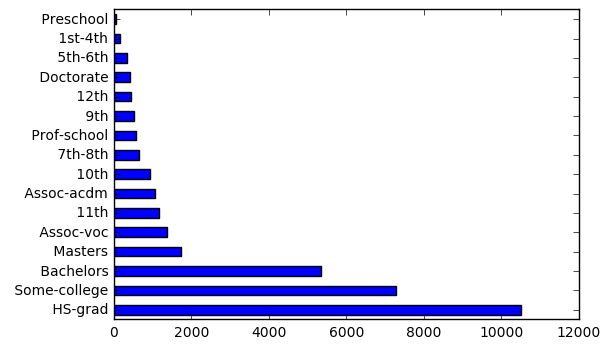

In [32]:
df.education.value_counts().plot('barh')

In [33]:
df.hours_per_week.mean()

# Can also do:
df['hours_per_week'].mean()

40.437455852092995

## Comprehension Question:

What do you think we will get if we ask for the `type` of `df.hours_per_week` ?


In [34]:
df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']].describe()

,age,capital_gain,capital_loss,hours_per_week
count,32561.000,32561.000,32561.000,32561.000
mean,38.582,1077.649,87.304,40.437
std,13.640,7385.292,402.960,12.347
min,17.000,0.000,0.000,1.000
25%,28.000,0.000,0.000,40.000
50%,37.000,0.000,0.000,40.000
75%,48.000,0.000,0.000,45.000
max,90.000,99999.000,4356.000,99.000


### Unique

Returns the unique values for the column

In [35]:
# there's a space before each string in this data
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [36]:
# looks like it's in every object column
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

In [37]:
df["education"] = df.education.str.strip()

In [38]:
# Hurray We removed the leading space
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
ethnicity         32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
df.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [41]:
df.gender.unique()

array([' Male', ' Female'], dtype=object)

In [42]:
# Remove leading space in values
df["gender"] = df.gender.str.strip()

In [43]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

## Selecting rows and columns 

### .loc 

* Selects row and columns by Names
* **by label**             `.loc[]`

### .iloc

* Selects row and columns by Index Position
* **by integer position**  `.iloc[]`


### .ix

* Redirects to `loc` or `iloc` based on input
* **for both**             `.ix[]`

http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [44]:
# select a row
df.iloc[3]

age                                53
workclass                     Private
fnlwgt                         234721
education                        11th
education_num                       7
marital_status     Married-civ-spouse
occupation          Handlers-cleaners
relationship                  Husband
ethnicity                       Black
gender                           Male
capital_gain                        0
capital_loss                        0
hours_per_week                     40
native_country          United-States
income                          <=50K
Name: 3, dtype: object

In [45]:
df.iloc[0:3]

## Note: I got 3 rows returned, similar to the indexing that applies to Python lists

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [46]:
# select a range of rows
df.iloc[10:15]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [47]:
# last 2 rows
df.iloc[-2:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [48]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

,fnlwgt,education,education_num
0,77516,Bachelors,13
2,215646,HS-grad,9
4,338409,Bachelors,13
6,160187,9th,5
8,45781,Masters,14


In [49]:
# select a row
df.loc[0:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


## Question:
Why did I get 4 rows above here instead of 3?





Integers vs. labels!

In [50]:
(df.loc[0:2, 'age'])

0    39
1    50
2    38
Name: age, dtype: int64

In [51]:
df.ix[0:2, 2:6]

,fnlwgt,education,education_num,marital_status
0,77516,Bachelors,13,Never-married
1,83311,Bachelors,13,Married-civ-spouse
2,215646,HS-grad,9,Divorced


## Recall:
`df.ix` is primarily label-based, but "falls back" to integer-based (if the columns or index are not numerical).

## Filtering

In [52]:
(df.age > 50)

0        False
1        False
2        False
3         True
4        False
5        False
6        False
7         True
8        False
9        False
10       False
11       False
         ...  
32549    False
32550    False
32551    False
32552    False
32553    False
32554     True
32555    False
32556    False
32557    False
32558     True
32559    False
32560     True
Name: age, dtype: bool

In [53]:
asd = df[df.age > 50].head(5)

In [54]:
# Filter for only certain Columns
df.loc[df.age > 50, ['age', 'education', 'occupation', 'gender', 'income']]

# What happens if I try to do the same with df.iloc instead of df.loc?
# What about df.ix?

,age,education,occupation,gender,income
3,53,11th,Handlers-cleaners,Male,<=50K
7,52,HS-grad,Exec-managerial,Male,>50K
21,54,HS-grad,Other-service,Female,<=50K
24,59,HS-grad,Tech-support,Female,<=50K
25,56,Bachelors,Tech-support,Male,>50K
27,54,Some-college,?,Male,>50K
41,53,Bachelors,Prof-specialty,Male,<=50K
45,57,Bachelors,Prof-specialty,Male,>50K
46,53,HS-grad,Machine-op-inspct,Male,<=50K
67,53,HS-grad,Adm-clerical,Female,>50K


In [55]:
df[df.age > 50].head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K


## Now Filter on Gender

In [56]:
df.gender=='Male'

0         True
1         True
2         True
3         True
4        False
5        False
6        False
7         True
8        False
9         True
10        True
11        True
         ...  
32549    False
32550     True
32551     True
32552     True
32553     True
32554     True
32555     True
32556    False
32557     True
32558    False
32559     True
32560    False
Name: gender, dtype: bool

In [57]:
df.loc[df.gender=='Male',]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


## Now Filter on Gender and Age between 30 and 40

In [58]:
(df.gender == 'Male') & (df.age>=30) & (df.age<=40)





0         True
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10        True
11        True
         ...  
32549    False
32550    False
32551     True
32552    False
32553     True
32554    False
32555    False
32556    False
32557     True
32558    False
32559    False
32560    False
dtype: bool

In [59]:
(df.age>=30)&(df.gender=='Male')

df.loc[(df.age>=30)&(df.gender=='Male')&(df.age<=40),:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
17,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
18,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


## Find Nulls

In [60]:
# as we saw with df.info() there are no nulls... 
# but if there were this would find the rows where age is null
df[df.age.isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income


## Fill nulls

In [61]:
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])

In [62]:
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [63]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000)

0       1.0
1       2.0
2       4.0
3    1000.0
Name: column1, dtype: float64

In [64]:
# fillna does not do it inplace unless you specify
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [65]:
# you can also fill null with the median or mean value of the column
null_df.fillna(null_df.column1.median(), inplace=True)
null_df

,column1
0,1.0
1,2.0
2,4.0
3,2.0


In [66]:
null_df.fillna('random_string')

,column1
0,1.0
1,2.0
2,4.0
3,2.0


## Drop nulls

In [67]:
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [68]:
null_df.dropna(how = 'any')

,column1
0,1.0
1,2.0
2,4.0


In [69]:
# .isnull() and .notnull() does opposite things
null_df.isnull()

,column1
0,False
1,False
2,False
3,True


In [70]:
null_df.notnull()

,column1
0,True
1,True
2,True
3,False


## Groupby

In [71]:
df.groupby('relationship').count()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
relationship,,,,,,,,,,,,,,
Husband,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193
Not-in-family,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305
Other-relative,981,981,981,981,981,981,981,981,981,981,981,981,981,981
Own-child,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068
Unmarried,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446
Wife,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568


In [72]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['education']).mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
education,,,,,,
10th,37.430,196832.465,6.0,404.574,56.846,37.053
11th,32.356,194928.077,7.0,215.098,50.079,33.926
12th,32.000,199097.508,8.0,284.088,32.337,35.781
1st-4th,46.143,239303.000,2.0,125.875,48.327,38.256
5th-6th,42.886,232448.333,3.0,176.021,68.252,38.898
7th-8th,48.446,188079.172,4.0,233.940,65.669,39.367
9th,41.060,202485.066,5.0,342.089,28.998,38.045
Assoc-acdm,37.381,193424.094,12.0,640.399,93.419,40.504
Assoc-voc,38.554,181936.017,11.0,715.051,72.755,41.611


In [73]:
df.groupby(['education','age',])[['hours_per_week','capital_gain']].mean()

hours_per_week  capital_gain
education    age                              
10th         17           21.543       266.659
             18           27.895         0.000
             19           34.500         0.000
             20           39.400         0.000
             21           39.000       229.882
             22           37.053         0.000
             23           42.588         0.000
             24           41.889         0.000
             25           38.714       123.667
             26           42.706       171.000
             27           46.059         0.000
             28           39.914         0.000
...                          ...           ...
Some-college 74           19.727      1822.818
             75           23.750         0.000
             76           23.714         0.000
             77           22.143         0.000
             78            3.000         0.000
             79           20.000         0.000
             80           40.000         0.000
             81           13.000         0.000
             82           11.500         0.000
             84           35.000         0.000
             88           40.000         0.000
             90           32.833         0.000

[965 rows x 2 columns]

In [74]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['count', 'mean'])
# grouped in order of which column is listed first

count    mean
income native_country                    
 <=50K  ?                     437  36.854
        Cambodia               12  35.667
        Canada                 82  41.012
        China                  55  41.800
        Columbia               57  39.228
        Cuba                   70  47.286
        Dominican-Republic     68  37.941
        Ecuador                24  34.833
        El-Salvador            97  32.649
        England                60  38.967
        France                 17  38.118
        Germany                93  36.817
...                           ...     ...
 >50K   Philippines            61  42.738
        Poland                 12  50.583
        Portugal                4  40.000
        Puerto-Rico            12  46.500
        Scotland                3  52.667
        South                  16  44.875
        Taiwan                 20  40.800
        Thailand                3  32.667
        Trinadad&Tobago         2  42.500
        United-States        7171  44.297
        Vietnam                 5  35.400
        Yugoslavia              6  40.167

[82 rows x 2 columns]

In [80]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [84]:
# can use the aggs function to aggregate columns seperately
gb=df.groupby(['income', 'native_country'])
gb_aggs=gb.agg({'age':'mean','capital_gain':'sum'})
gb_aggs.sample(1)

,,capital_gain,age
income,native_country,,
<=50K,Peru,1831,35.379


In [75]:
# combine groupby with boolean
df[df.native_country == ' United-States'].groupby(['education']).hours_per_week.mean()

education
10th            36.915
11th            33.682
12th            34.951
1st-4th         32.913
5th-6th         36.979
7th-8th         39.060
9th             38.035
Assoc-acdm      40.657
Assoc-voc       41.633
Bachelors       42.709
Doctorate       47.409
HS-grad         40.596
Masters         44.169
Preschool       28.118
Prof-school     47.484
Some-college    38.862
Name: hours_per_week, dtype: float64

## Sorting
* ### sort_index() to sort by index
* ### sort_values() to sort by values

In [76]:
# groupby income and country and then sort by their mean age within each data block
df_grouped = df.groupby(['income','native_country']).mean().sort_values('age', ascending = True)
df_grouped

# Note: In this example, the groupby, mean, and sort functions are stringed together in one line
# in the next example, we will show a different syntax so that you could write them on separate
# lines to make the code a little easier to read

age      fnlwgt  education_num  capital_gain  \
income native_country                                                         
 <=50K  Taiwan              29.323  181981.290         12.548        71.032   
 >50K   Dominican-Republic  30.500  220226.000          9.000     49999.500   
        Hong                31.500  294478.833         13.833         0.000   
 <=50K  Holand-Netherlands  32.000   27882.000         10.000         0.000   
        Guatemala           32.262  266016.016          5.951       116.148   
        El-Salvador         32.649  264114.124          6.340       190.773   
 >50K   Thailand            32.667  199784.000         12.667         0.000   
 <=50K  Honduras            32.750  272571.000          8.167         0.000   
        Mexico              32.902  289038.116          5.959       135.538   
 >50K   Peru                33.500  314562.500         11.500         0.000   
 <=50K  Nicaragua           33.594  287987.906          8.656       212.312   
        Laos                33.938  209838.188          8.500       180.312   
...                            ...         ...            ...           ...   
 >50K   Honduras            47.000   51835.000         15.000         0.000   
 <=50K  Hungary             47.000  182993.800         10.700       413.800   
        Cuba                47.286  243906.229          9.043       136.986   
 >50K   Ecuador             47.500  169428.750         10.500      2346.500   
        Haiti               48.000  206832.500          9.500         0.000   
        El-Salvador         50.111  149620.556         12.222      4708.111   
        Greece              50.250  121954.125         11.125      3741.250   
        Italy               50.360  185383.360         10.960      1253.040   
        Poland              50.583  179314.167         11.083      2743.083   
        Scotland            52.667  208306.667         10.667      1726.000   
        Columbia            53.500  283410.500         15.500         0.000   
        Hungary             57.333  172137.333         11.000      1726.000   

                            capital_loss  hours_per_week  
income native_country                                     
 <=50K  Taiwan                    51.677          33.774  
 >50K   Dominican-Republic         0.000          47.000  
        Hong                     329.500          45.000  
 <=50K  Holand-Netherlands      2205.000          40.000  
        Guatemala                 26.131          39.361  
        El-Salvador               34.000          36.031  
 >50K   Thailand                   0.000          58.333  
 <=50K  Honduras                   0.000          34.333  
        Mexico                    22.990          40.003  
 >50K   Peru                     924.000          40.000  
 <=50K  Nicaragua                 49.344          36.094  
        Laos                       0.000          40.375  
...                                  ...             ...  
 >50K   Honduras                1902.000          60.000  
 <=50K  Hungary                  166.800          31.300  
        Cuba                      19.714          37.986  
 >50K   Ecuador                    0.000          48.750  
        Haiti                      0.000          42.750  
        El-Salvador                0.000          45.000  
        Greece                   539.625          50.625  
        Italy                     79.080          45.400  
        Poland                     0.000          39.000  
        Scotland                   0.000          46.667  
        Columbia                   0.000          50.000  
        Hungary                    0.000          50.000  

[82 rows x 6 columns]

In [77]:
# We want to group people by their income and country
# Then sort them by their income ASCE, and then sort by average age within that group DESC 
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
 .sort_values(['income','age'], ascending=[True,False])
)

# Note: In this example, we sort by the SAME column which we grouped by earlier 
# (eg. we first groupby 'income' and then sort by 'income')
# In this case, we must use .reset_index() to re-index the groupby objects, because the 'income' 
# column no longer exists after the groupby and hence cannot be sorted directly

,income,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
5,<=50K,Cuba,47.286,243906.229,9.043,136.986,19.714,37.986
18,<=50K,Hungary,47.000,182993.800,10.700,413.800,166.800,31.300
12,<=50K,Greece,44.667,151661.286,9.190,347.762,202.429,41.810
22,<=50K,Italy,44.375,179759.375,7.750,277.375,0.000,39.625
3,<=50K,China,41.800,175689.182,10.309,103.891,94.418,37.382
31,<=50K,Poland,41.250,185051.479,9.854,169.583,42.729,38.167
38,<=50K,Trinadad&Tobago,41.176,218778.941,8.412,0.000,137.588,37.059
2,<=50K,Canada,41.012,169279.585,10.244,110.695,145.524,37.915
32,<=50K,Portugal,40.333,153666.939,6.212,256.061,0.000,41.939
33,<=50K,Puerto-Rico,39.804,200316.010,8.108,83.980,43.078,38.471
